In [7]:
import numpy as np
import pandas as pd
train_df = pd.read_csv('train.csv', nrows=1000000)
train_df.shape

(1000000, 8)

In [8]:
#remove unwanted data. After multiple iterations and runs, efficient way to data clean

required_data = (train_df['fare_amount'].between(2.5, 200) & train_df['passenger_count'].between(0, 6) & 
                train_df['pickup_longitude'].between(-74.5, -72.5) & train_df['dropoff_longitude'].between(-74.5, -72.5) &
                train_df['pickup_latitude'].between(40, 42) & train_df['dropoff_latitude'].between(40, 42))



In [9]:
train_df.shape


(1000000, 8)

In [10]:
train_df = train_df[required_data]

In [11]:
train_df.shape

(979060, 8)

In [16]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [18]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])

In [19]:
def extractdatetime(data):
    data['hour'] = data['pickup_datetime'].dt.hour
    data['year'] = data['pickup_datetime'].dt.year
    data['month'] = data['pickup_datetime'].dt.month
    data['date'] = data['pickup_datetime'].dt.day
    data['day'] = data['pickup_datetime'].dt.dayofweek
    return data

train_df=extractdatetime(train_df)

In [20]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,2009,6,15,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,2010,1,5,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,2011,8,18,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,2012,4,21,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,2010,3,9,1


In [145]:
#Thanks to Stack_Overflow. Another efficient way of calculating distnce when co-or are given (Haversine Distance)
def distance(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude):
    pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude = map(np.radians, [pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude])
    dlong = dropoff_longitude - pickup_longitude
    dlat = dropoff_latitude - pickup_latitude
    a = np.sin(dlat/2.0)**2 + np.cos(pickup_latitude) * np.cos(dropoff_latitude) * np.sin(dlong/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6367 * c
    return distance

train_df['distance'] = distance(train_df['pickup_longitude'], train_df['pickup_latitude'],
                            train_df['dropoff_longitude'], train_df['dropoff_latitude'])

In [23]:
train_df.head(1)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.84161,40.712278,1,17,2009,6,15,0,1.030117


In [24]:
print(train_df.corrwith(train_df['fare_amount']))

fare_amount          1.000000
pickup_longitude     0.380484
pickup_latitude     -0.189488
dropoff_longitude    0.290090
dropoff_latitude    -0.158196
passenger_count      0.014383
hour                -0.019302
year                 0.117216
month                0.025561
date                 0.001324
day                  0.002705
distance             0.821817
dtype: float64


In [25]:
def absolute_coordinates(data):
    data['absolute_longitude'] = (data.dropoff_longitude - data.pickup_longitude).abs()
    data['absolute_latitude'] = (data.dropoff_latitude - data.pickup_latitude).abs()
    return data

train_df=absolute_coordinates(train_df)

In [26]:
train_df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day,distance,absolute_longitude,absolute_latitude
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,2009,6,15,0,1.030117,0.002701,0.009041
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,2010,1,5,1,8.444828,0.036780,0.070701


In [27]:
def E_distance(lat1, long1, lat2, long2):
    sqlat=(lat1-lat2)**2
    sqlong=(long1-long2)**2
    e_distance = np.sqrt(sqlat+sqlong)
    return e_distance

In [28]:
train_df['e_distance'] = E_distance(train_df.pickup_latitude, train_df.pickup_longitude, 
                               train_df.dropoff_latitude, train_df.dropoff_longitude)

In [29]:
train_df.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day,distance,absolute_longitude,absolute_latitude,e_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,2009,6,15,0,1.030117,0.002701,0.009041,0.009436
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,2010,1,5,1,8.444828,0.036780,0.070701,0.079696
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,2011,8,18,3,1.388653,0.008504,0.010708,0.013674
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,2012,4,21,5,2.797513,0.004437,0.024949,0.025340
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,2010,3,9,1,1.997902,0.011440,0.015754,0.019470


In [30]:
print(train_df.corrwith(train_df['fare_amount']))

fare_amount           1.000000
pickup_longitude      0.380484
pickup_latitude      -0.189488
dropoff_longitude     0.290090
dropoff_latitude     -0.158196
passenger_count       0.014383
hour                 -0.019302
year                  0.117216
month                 0.025561
date                  0.001324
day                   0.002705
distance              0.821817
absolute_longitude    0.778014
absolute_latitude     0.643646
e_distance            0.830235
dtype: float64


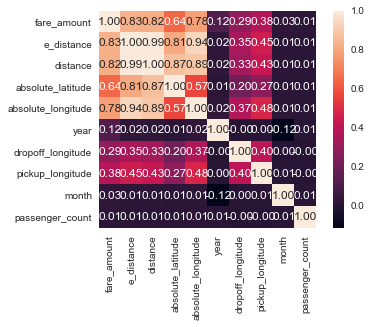

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

spearman_correlation = train_df.corr(method='spearman')
pick_columns=spearman_correlation.nlargest(10, 'fare_amount').index
correlationmap = np.corrcoef(train_df[pick_columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlationmap, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns_new.values, xticklabels=columns_new.values)

plt.show()

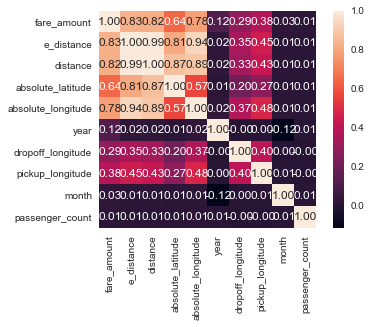

In [147]:

import seaborn as sns
import matplotlib.pyplot as plt

spearman_correlation = train_df.corr(method='spearman')
pick_columns=spearman_correlation.nlargest(10, 'fare_amount').index
correlationmap = np.corrcoef(train_df[pick_columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlationmap, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns_new.values, xticklabels=columns_new.values)

plt.show()

In [33]:
print(train_df.corrwith(train_df['fare_amount']))

fare_amount           1.000000
pickup_longitude      0.380484
pickup_latitude      -0.189488
dropoff_longitude     0.290090
dropoff_latitude     -0.158196
passenger_count       0.014383
hour                 -0.019302
year                  0.117216
month                 0.025561
date                  0.001324
day                   0.002705
distance              0.821817
absolute_longitude    0.778014
absolute_latitude     0.643646
e_distance            0.830235
dtype: float64


In [35]:
train_df.corr(method='pearson')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day,distance,absolute_longitude,absolute_latitude,e_distance
fare_amount,1.000000,0.380484,-0.189488,0.290090,-0.158196,0.014383,-0.019302,0.117216,0.025561,0.001324,0.002705,0.821817,0.778014,0.643646,0.830235
pickup_longitude,0.380484,1.000000,0.127059,0.400761,0.134755,-0.000187,0.017943,0.002308,0.006070,-0.000718,-0.023948,0.427645,0.480205,0.274334,0.449165
pickup_latitude,-0.189488,0.127059,1.000000,0.152140,0.477618,-0.008182,0.027865,-0.019389,-0.003308,-0.001333,-0.037401,-0.150194,-0.142469,-0.121836,-0.151735
dropoff_longitude,0.290090,0.400761,0.152140,1.000000,0.224905,-0.001703,-0.041459,-0.000607,0.003969,0.001591,-0.001651,0.331222,0.370528,0.204497,0.347684
dropoff_latitude,-0.158196,0.134755,0.477618,0.224905,1.000000,-0.005280,0.019237,-0.010996,-0.003789,-0.000651,-0.029018,-0.126818,-0.112310,-0.099454,-0.128410
passenger_count,0.014383,-0.000187,-0.008182,-0.001703,-0.005280,1.000000,0.016911,0.005895,0.005063,0.004087,0.036502,0.010159,0.009188,0.008285,0.010159
hour,-0.019302,0.017943,0.027865,-0.041459,0.019237,0.016911,1.000000,0.002265,-0.004232,0.001937,-0.087941,-0.030058,-0.028384,-0.022125,-0.030376
year,0.117216,0.002308,-0.019389,-0.000607,-0.010996,0.005895,0.002265,1.000000,-0.118296,-0.010228,0.008907,0.019339,0.022054,0.011552,0.020448
month,0.025561,0.006070,-0.003308,0.003969,-0.003789,0.005063,-0.004232,-0.118296,1.000000,-0.015680,-0.007703,0.013807,0.013907,0.010459,0.014082
date,0.001324,-0.000718,-0.001333,0.001591,-0.000651,0.004087,0.001937,-0.010228,-0.015680,1.000000,0.007245,0.001529,0.001467,0.001075,0.001541


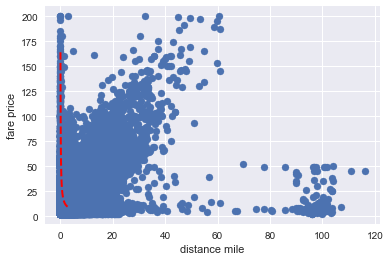

In [38]:
import matplotlib.pyplot as plt

plt.scatter(train_df.distance, train_df.fare_amount)
plt.xlabel('distance mile')
plt.ylabel('fare price')

# theta here is estimated by hand
theta = (16, 4.0)
x = np.linspace(0.1, 3, 50)
plt.plot(x, theta[0]/x + theta[1], '--', c='r', lw=2);

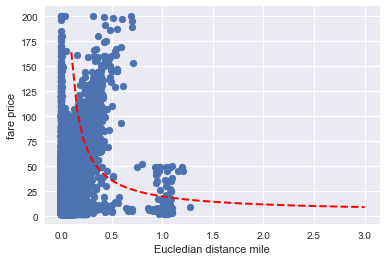

In [39]:
import matplotlib.pyplot as plt

plt.scatter(train_df.e_distance, train_df.fare_amount)
plt.xlabel('Eucledian distance mile')
plt.ylabel('fare price')

# theta here is estimated by hand
theta = (16, 4.0)
x = np.linspace(0.1, 3, 50)
plt.plot(x, theta[0]/x + theta[1], '--', c='r', lw=2);

Text(0,0.5,'Fare')

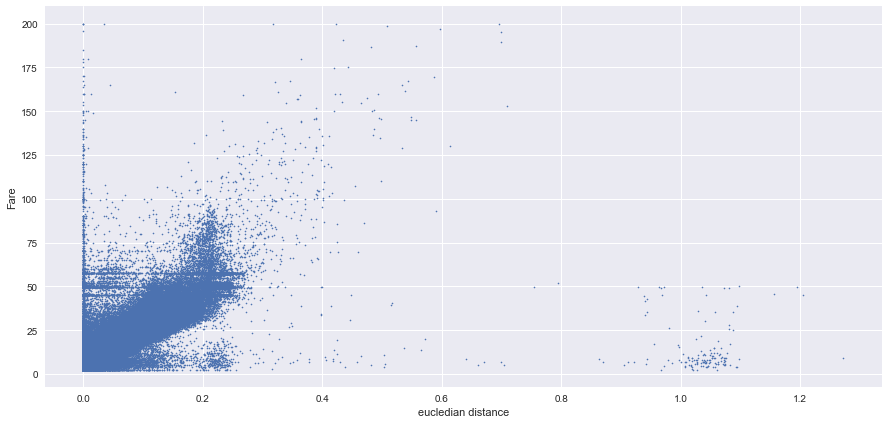

In [41]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['e_distance'], y=train_df['fare_amount'], s=1.5)
plt.xlabel('eucledian distance')
plt.ylabel('Fare')

Text(0,0.5,'Fare')

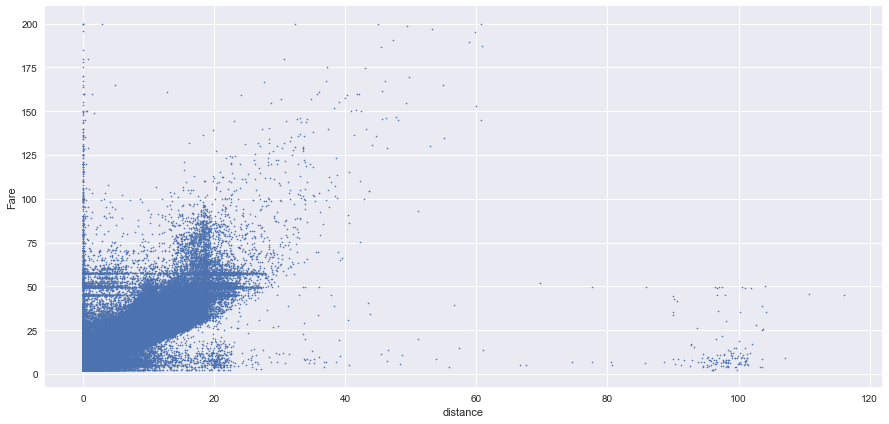

In [42]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['distance'], y=train_df['fare_amount'], s=1.5)
plt.xlabel('distance')
plt.ylabel('Fare')

Text(0,0.5,'Fare')

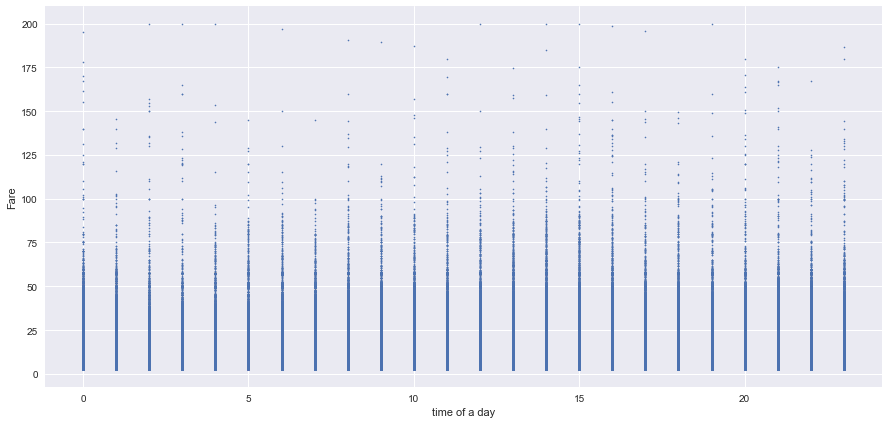

In [43]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['hour'], y=train_df['fare_amount'], s=1.5)
plt.xlabel('time of a day')
plt.ylabel('Fare')

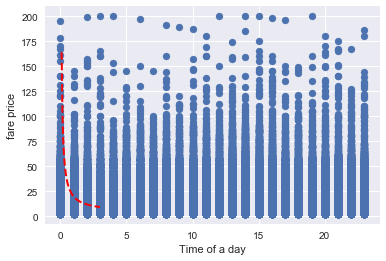

In [44]:
import matplotlib.pyplot as plt

plt.scatter(train_df.hour, train_df.fare_amount)
plt.xlabel('Time of a day')
plt.ylabel('fare price')

# theta here is estimated by hand
theta = (16, 4.0)
x = np.linspace(0.1, 3, 50)
plt.plot(x, theta[0]/x + theta[1], '--', c='r', lw=2);

Text(0,0.5,'Eucledian distance')

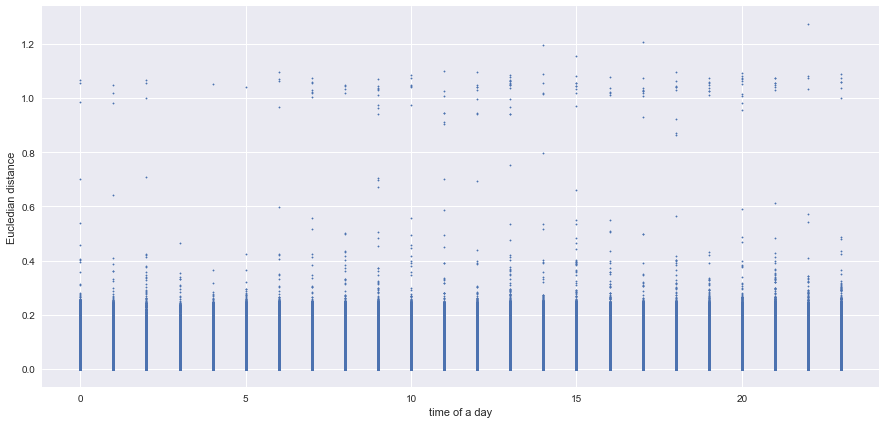

In [45]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['hour'], y=train_df['e_distance'], s=2)
plt.xlabel('time of a day')
plt.ylabel('Eucledian distance')

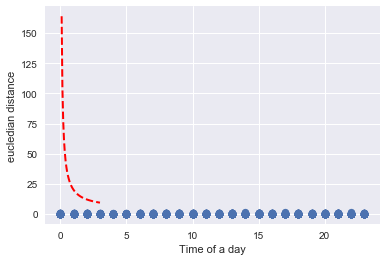

In [46]:
import matplotlib.pyplot as plt

plt.scatter(train_df.hour, train_df.e_distance)
plt.xlabel('Time of a day')
plt.ylabel('eucledian distance')

# theta here is estimated by hand
theta = (16, 4.0)
x = np.linspace(0.1, 3, 50)
plt.plot(x, theta[0]/x + theta[1], '--', c='r', lw=2);

In [47]:
train_df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day,distance,absolute_longitude,absolute_latitude,e_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,2009,6,15,0,1.030117,0.002701,0.009041,0.009436
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,2010,1,5,1,8.444828,0.036780,0.070701,0.079696


Text(0,0.5,'Absolute Longitude')

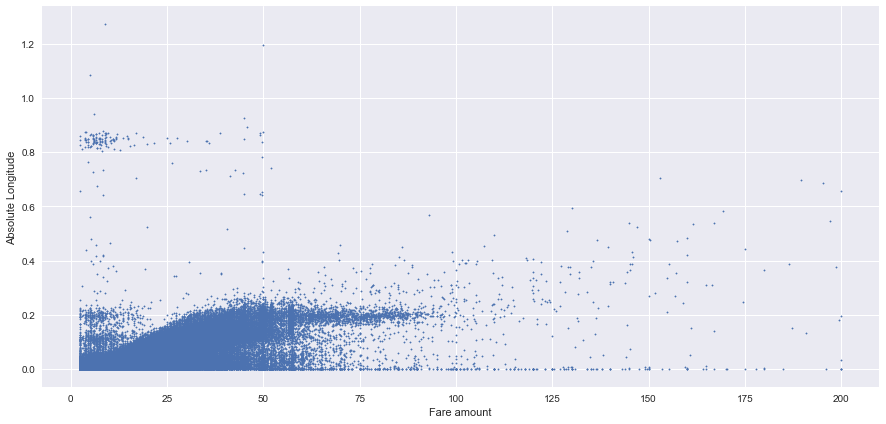

In [48]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['fare_amount'], y=train_df['absolute_longitude'], s=2)
plt.xlabel('Fare amount')
plt.ylabel('Absolute Longitude')

Text(0,0.5,'Absolute Latitude')

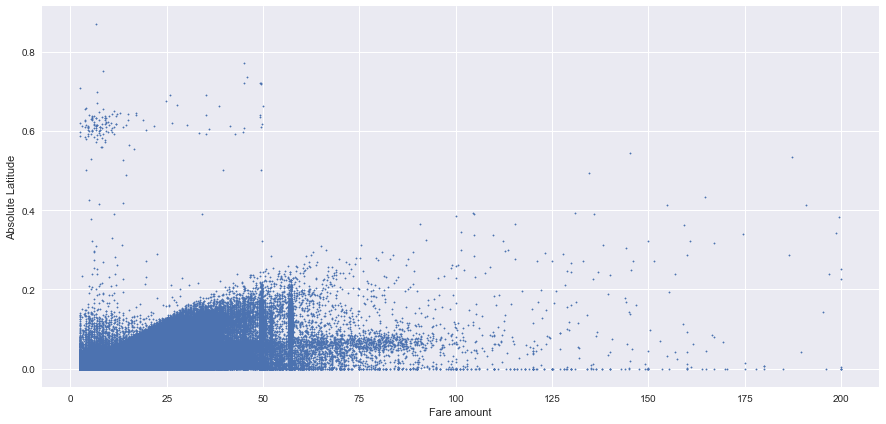

In [49]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['fare_amount'], y=train_df['absolute_latitude'], s=2)
plt.xlabel('Fare amount')
plt.ylabel('Absolute Latitude')

Text(0,0.5,'Frequency')

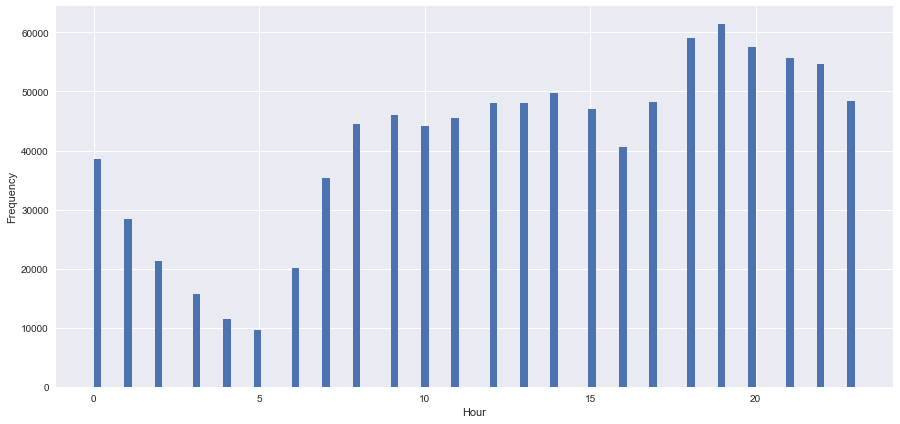

In [51]:
plt.figure(figsize=(15,7))
plt.hist(train_df['hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Text(0,0.5,'fare amount')

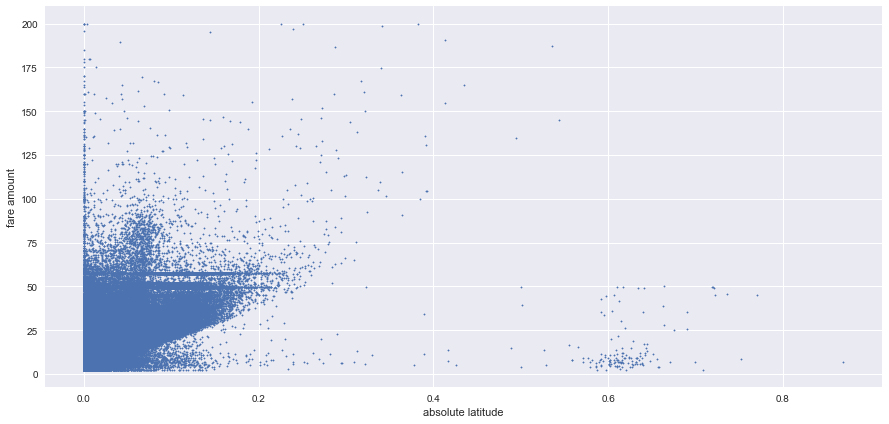

In [52]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['absolute_latitude'], y=train_df['fare_amount'], s=2)
plt.xlabel('absolute latitude')
plt.ylabel('fare amount')

Text(0,0.5,'e_distance')

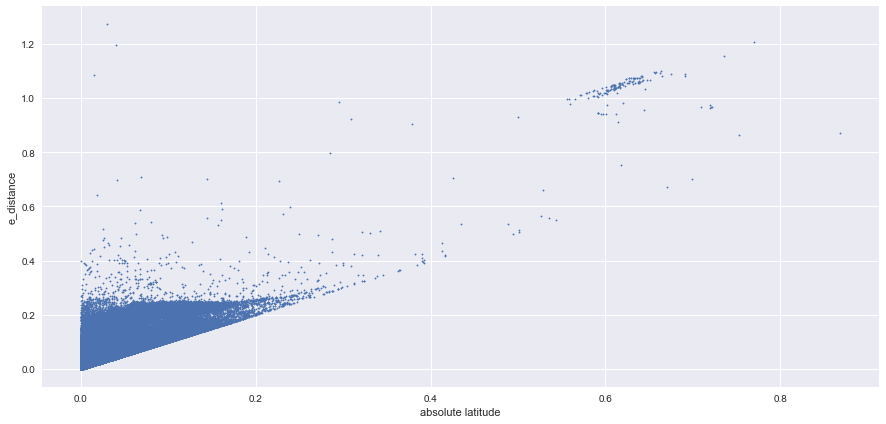

In [53]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['absolute_latitude'], y=train_df['e_distance'], s=2)
plt.xlabel('absolute latitude')
plt.ylabel('e_distance')

Text(0,0.5,'e_distance')

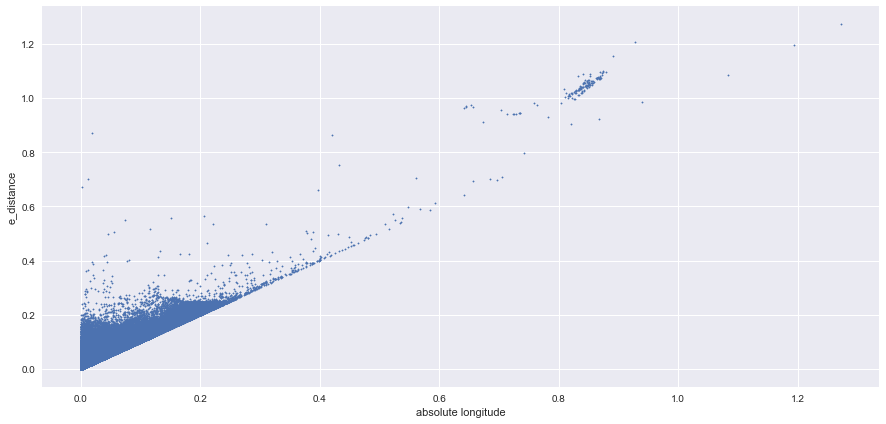

In [54]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['absolute_longitude'], y=train_df['e_distance'], s=2)
plt.xlabel('absolute longitude')
plt.ylabel('e_distance')

Text(0,0.5,'e_distance')

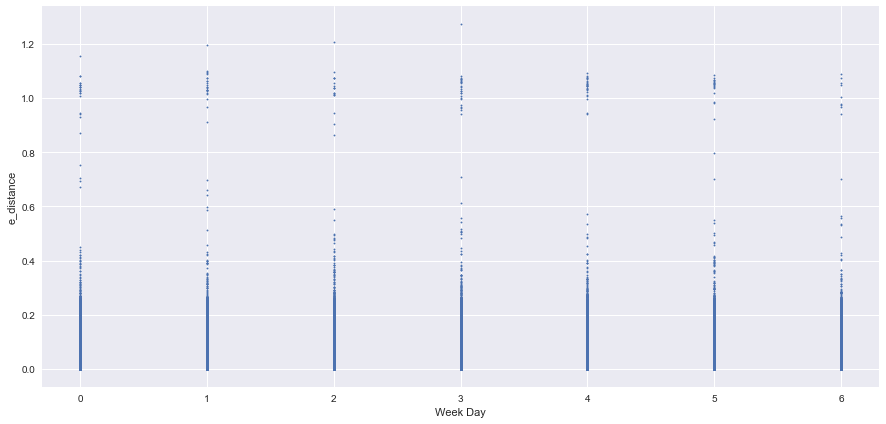

In [55]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['day'], y=train_df['e_distance'], s=2)
plt.xlabel('Week Day')
plt.ylabel('e_distance')

Text(0,0.5,'Frequency')

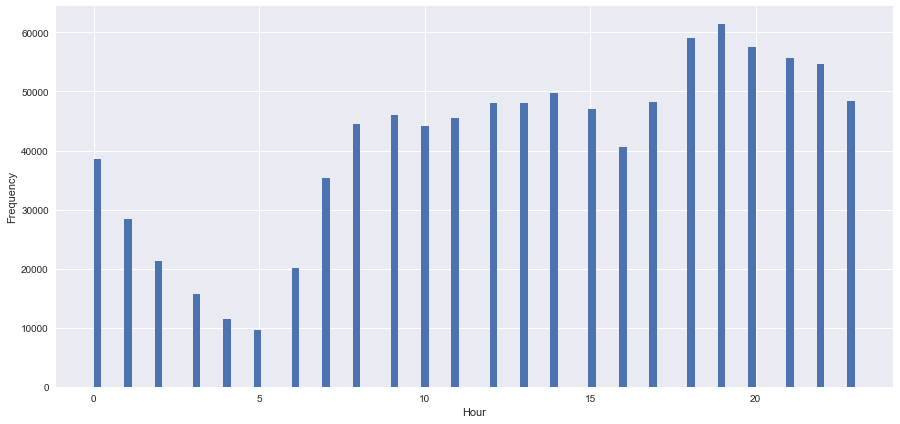

In [57]:
plt.figure(figsize=(15,7))
plt.hist(train_df['hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Text(0,0.5,'Fare')

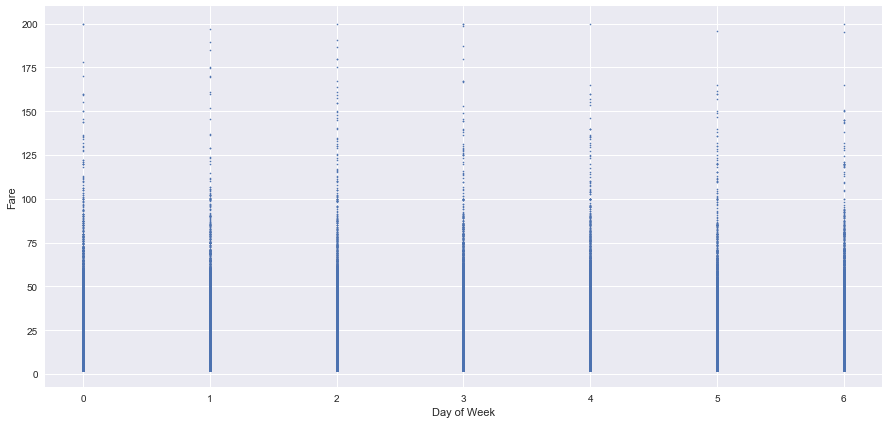

In [59]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['day'], y=train_df['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

Text(0,0.5,'Fare')

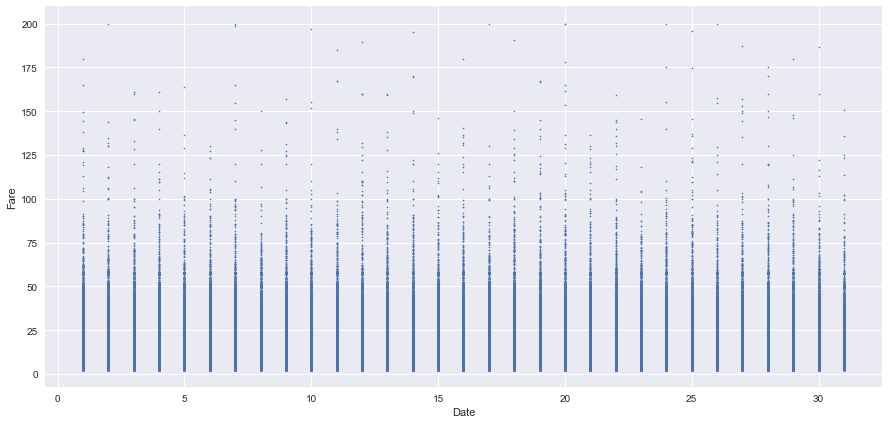

In [61]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['date'], y=train_df['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

Text(0,0.5,'Frequency')

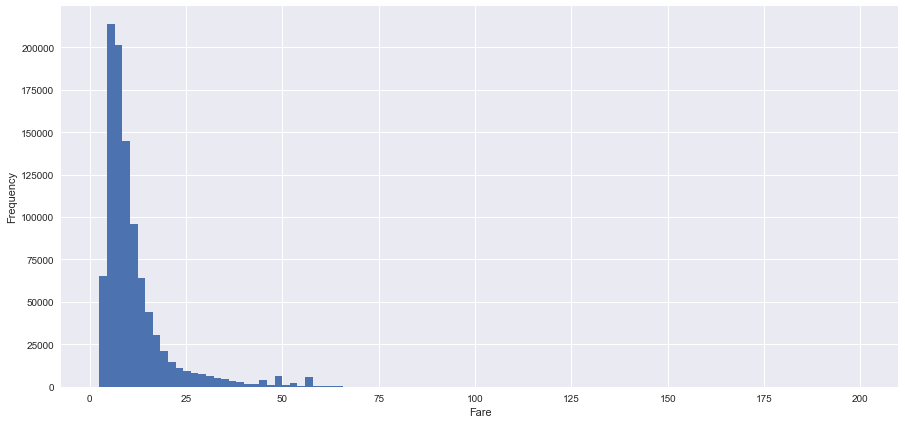

In [65]:
plt.figure(figsize=(15,7))
plt.hist(train_df['fare_amount'], bins=100)
plt.xlabel('Fare')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

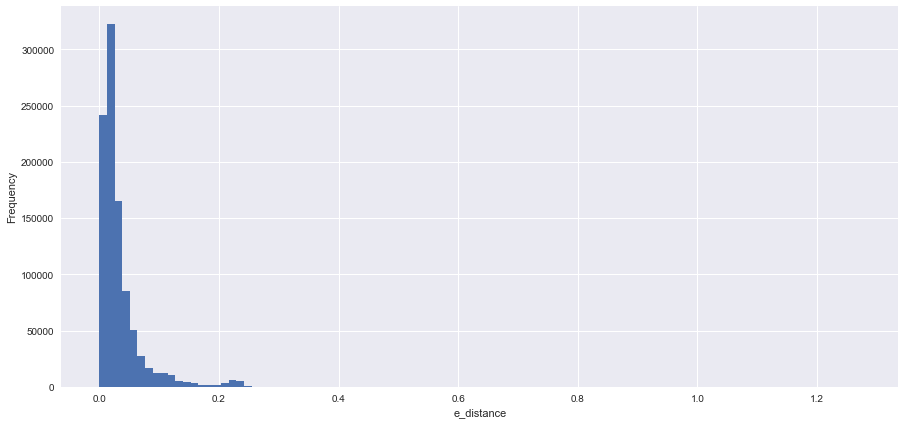

In [66]:
plt.figure(figsize=(15,7))
plt.hist(train_df['e_distance'], bins=100)
plt.xlabel('e_distance')
plt.ylabel('Frequency')

In [67]:
train_df.corr(method='pearson')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day,distance,absolute_longitude,absolute_latitude,e_distance
fare_amount,1.000000,0.380484,-0.189488,0.290090,-0.158196,0.014383,-0.019302,0.117216,0.025561,0.001324,0.002705,0.821817,0.778014,0.643646,0.830235
pickup_longitude,0.380484,1.000000,0.127059,0.400761,0.134755,-0.000187,0.017943,0.002308,0.006070,-0.000718,-0.023948,0.427645,0.480205,0.274334,0.449165
pickup_latitude,-0.189488,0.127059,1.000000,0.152140,0.477618,-0.008182,0.027865,-0.019389,-0.003308,-0.001333,-0.037401,-0.150194,-0.142469,-0.121836,-0.151735
dropoff_longitude,0.290090,0.400761,0.152140,1.000000,0.224905,-0.001703,-0.041459,-0.000607,0.003969,0.001591,-0.001651,0.331222,0.370528,0.204497,0.347684
dropoff_latitude,-0.158196,0.134755,0.477618,0.224905,1.000000,-0.005280,0.019237,-0.010996,-0.003789,-0.000651,-0.029018,-0.126818,-0.112310,-0.099454,-0.128410
passenger_count,0.014383,-0.000187,-0.008182,-0.001703,-0.005280,1.000000,0.016911,0.005895,0.005063,0.004087,0.036502,0.010159,0.009188,0.008285,0.010159
hour,-0.019302,0.017943,0.027865,-0.041459,0.019237,0.016911,1.000000,0.002265,-0.004232,0.001937,-0.087941,-0.030058,-0.028384,-0.022125,-0.030376
year,0.117216,0.002308,-0.019389,-0.000607,-0.010996,0.005895,0.002265,1.000000,-0.118296,-0.010228,0.008907,0.019339,0.022054,0.011552,0.020448
month,0.025561,0.006070,-0.003308,0.003969,-0.003789,0.005063,-0.004232,-0.118296,1.000000,-0.015680,-0.007703,0.013807,0.013907,0.010459,0.014082
date,0.001324,-0.000718,-0.001333,0.001591,-0.000651,0.004087,0.001937,-0.010228,-0.015680,1.000000,0.007245,0.001529,0.001467,0.001075,0.001541


In [68]:
train_df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day,distance,absolute_longitude,absolute_latitude,e_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,2009,6,15,0,1.030117,0.002701,0.009041,0.009436
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,2010,1,5,1,8.444828,0.036780,0.070701,0.079696


In [69]:
train_df.shape

(979060, 17)

In [70]:
train_df_train = train_df[:600000]
train_df_test = train_df[600001:]

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

train_df_train=train_df_train.drop(['key','pickup_datetime'], axis = 1)
train_df_test=train_df_test.drop(['key','pickup_datetime'], axis = 1)

In [73]:
train_df_train.shape

(600000, 17)

In [74]:
train_df_test.shape

(379059, 15)

In [75]:
train_df_train=train_df_train.drop(['key','pickup_datetime'], axis = 1)

In [76]:
train_df_train.shape

(600000, 15)

In [78]:
train_df_test.head(1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day,distance,absolute_longitude,absolute_latitude,e_distance
612897,10.5,-74.005414,40.736925,-73.973531,40.754818,1,16,2009,5,7,3,3.340453,0.031883,0.017893,0.036561


In [79]:
train_df_train = train_df[:600000]
train_df_train=train_df_train.drop(['key','pickup_datetime'], axis = 1)
train_df_train.shape

(600000, 15)

In [80]:
train_df_test.shape

(379059, 15)

In [81]:
train_df_test.head(1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day,distance,absolute_longitude,absolute_latitude,e_distance
612897,10.5,-74.005414,40.736925,-73.973531,40.754818,1,16,2009,5,7,3,3.340453,0.031883,0.017893,0.036561


In [82]:
train_df_train.head(1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day,distance,absolute_longitude,absolute_latitude,e_distance
0,4.5,-73.844311,40.721319,-73.84161,40.712278,1,17,2009,6,15,0,1.030117,0.002701,0.009041,0.009436


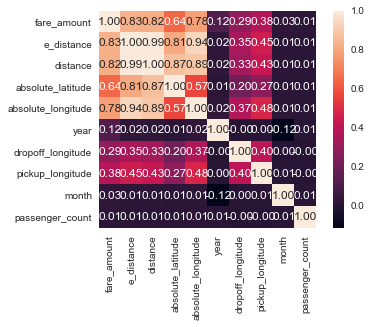

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

spearman_correlation = train_df.corr(method='spearman')
pick_columns=spearman_correlation.nlargest(10, 'fare_amount').index
correlationmap = np.corrcoef(train_df[pick_columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlationmap, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns_new.values, xticklabels=columns_new.values)

plt.show()

In [84]:
train_df_train.corr(method='pearson')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day,distance,absolute_longitude,absolute_latitude,e_distance
fare_amount,1.000000,0.378509,-0.190201,0.293431,-0.160454,0.015512,-0.019601,0.118150,0.025915,0.001582,0.003794,0.820697,0.776904,0.642137,0.829034
pickup_longitude,0.378509,1.000000,0.121854,0.399245,0.129408,0.000417,0.016823,0.002458,0.005252,-0.000147,-0.023110,0.426361,0.477614,0.274753,0.447487
pickup_latitude,-0.190201,0.121854,1.000000,0.146242,0.475894,-0.007644,0.028402,-0.019085,-0.004989,-0.001851,-0.037026,-0.148876,-0.141830,-0.120143,-0.150511
dropoff_longitude,0.293431,0.399245,0.146242,1.000000,0.221165,-0.002148,-0.041793,-0.000658,0.003540,0.002497,-0.000431,0.336094,0.375410,0.207327,0.352687
dropoff_latitude,-0.160454,0.129408,0.475894,0.221165,1.000000,-0.004896,0.019558,-0.011306,-0.004553,-0.001064,-0.029111,-0.126898,-0.112585,-0.099224,-0.128496
passenger_count,0.015512,0.000417,-0.007644,-0.002148,-0.004896,1.000000,0.016291,0.006168,0.005130,0.004379,0.037375,0.011486,0.010140,0.009688,0.011424
hour,-0.019601,0.016823,0.028402,-0.041793,0.019558,0.016291,1.000000,0.002390,-0.003903,0.001925,-0.087883,-0.030221,-0.029412,-0.021452,-0.030735
year,0.118150,0.002458,-0.019085,-0.000658,-0.011306,0.006168,0.002390,1.000000,-0.117604,-0.009796,0.009232,0.019862,0.022470,0.012119,0.020931
month,0.025915,0.005252,-0.004989,0.003540,-0.004553,0.005130,-0.003903,-0.117604,1.000000,-0.016260,-0.008651,0.013938,0.013659,0.010846,0.014123
date,0.001582,-0.000147,-0.001851,0.002497,-0.001064,0.004379,0.001925,-0.009796,-0.016260,1.000000,0.007218,0.001653,0.002136,0.000668,0.001798


In [85]:
train_df_train=train_df_train.drop(['hour','passenger_count', 'month', 'date', 'day'], axis = 1)
train_df_test=train_df_test.drop(['hour','passenger_count', 'month', 'date', 'day'], axis = 1)

In [86]:
train_df_train.head(1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,distance,absolute_longitude,absolute_latitude,e_distance
0,4.5,-73.844311,40.721319,-73.84161,40.712278,2009,1.030117,0.002701,0.009041,0.009436


In [87]:
train_df_test.head(1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,distance,absolute_longitude,absolute_latitude,e_distance
612897,10.5,-74.005414,40.736925,-73.973531,40.754818,2009,3.340453,0.031883,0.017893,0.036561


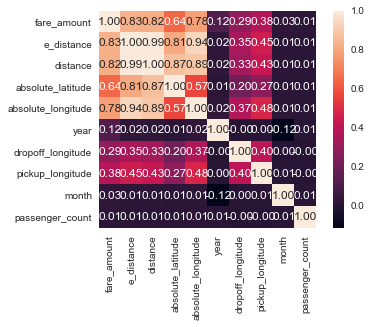

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

spearman_correlation = train_df.corr(method='spearman')
pick_columns=spearman_correlation.nlargest(10, 'fare_amount').index
correlationmap = np.corrcoef(train_df[pick_columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlationmap, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns_new.values, xticklabels=columns_new.values)

plt.show()

In [89]:
X = train_df_train.drop('fare_amount',axis=1)
y = y = train_df_train[['fare_amount']]

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
from sklearn.metrics import mean_squared_error, explained_variance_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [150]:
#Thanks to Abhishek Reddy Y N for helping me with this API
from sklearn.metrics import mean_squared_error

standard_scaler = StandardScaler().fit(X_train)
rescaled_X_train = standard_scaler.transform(X_train)
lin_model = LinearRegression()
lin_model.fit(rescaled_X_train, y_train)
pred = lin_model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,pred))
print(error)

1835.9237230723259


In [151]:
print(pred)

[[1849.90727538]
 [1842.94903849]
 [1848.60092089]
 ...
 [1846.83974631]
 [1844.98424555]
 [1846.42364865]]


In [95]:
train_df_train = train_df

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

train_df_train=train_df_train.drop(['key','pickup_datetime'], axis = 1)

In [97]:
train_df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day,distance,absolute_longitude,absolute_latitude,e_distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,2009,6,15,0,1.030117,0.002701,0.009041,0.009436
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,2010,1,5,1,8.444828,0.036780,0.070701,0.079696
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,2011,8,18,3,1.388653,0.008504,0.010708,0.013674
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,2012,4,21,5,2.797513,0.004437,0.024949,0.025340
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,2010,3,9,1,1.997902,0.011440,0.015754,0.019470


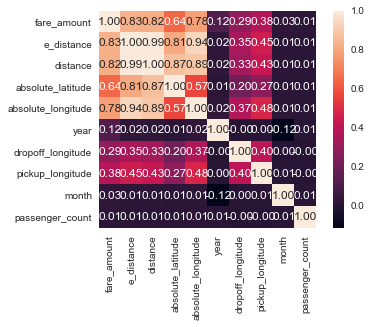

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

spearman_correlation = train_df.corr(method='spearman')
pick_columns=spearman_correlation.nlargest(10, 'fare_amount').index
correlationmap = np.corrcoef(train_df[pick_columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlationmap, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns_new.values, xticklabels=columns_new.values)

plt.show()

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [100]:
from sklearn.metrics import mean_squared_error, explained_variance_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [153]:
from sklearn.metrics import mean_squared_error

standard_scaler = StandardScaler().fit(X_train)
rescaled_X_train = standard_scaler.transform(X_train)
lin_model = LinearRegression()
lin_model.fit(rescaled_X_train, y_train)
pred = lin_model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,pred))
print(error)

1835.9237230723259


In [102]:
train_df_train=train_df_train.drop(['passenger_count','hour','date','month','day'], axis = 1)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [154]:
from sklearn.metrics import mean_squared_error

standard_scaler = StandardScaler().fit(X_train)
rescaled_X_train = standard_scaler.transform(X_train)
lin_model = LinearRegression()
lin_model.fit(rescaled_X_train, y_train)
pred = lin_model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,pred))
print(error)

1835.9237230723259


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [155]:
from sklearn.metrics import mean_squared_error

standard_scaler = StandardScaler().fit(X_train)
rescaled_X_train = standard_scaler.transform(X_train)
lin_model = LinearRegression()
lin_model.fit(rescaled_X_train, y_train)
pred = lin_model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,pred))
print(error)

1835.9237230723259


In [156]:
print(pred)

[[1849.90727538]
 [1842.94903849]
 [1848.60092089]
 ...
 [1846.83974631]
 [1844.98424555]
 [1846.42364865]]


In [157]:
train_df_train.corr(method='pearson')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,distance,absolute_longitude,absolute_latitude,e_distance
fare_amount,1.000000,0.380484,-0.189488,0.290090,-0.158196,0.117216,0.821817,0.778014,0.643646,0.830235
pickup_longitude,0.380484,1.000000,0.127059,0.400761,0.134755,0.002308,0.427645,0.480205,0.274334,0.449165
pickup_latitude,-0.189488,0.127059,1.000000,0.152140,0.477618,-0.019389,-0.150194,-0.142469,-0.121836,-0.151735
dropoff_longitude,0.290090,0.400761,0.152140,1.000000,0.224905,-0.000607,0.331222,0.370528,0.204497,0.347684
dropoff_latitude,-0.158196,0.134755,0.477618,0.224905,1.000000,-0.010996,-0.126818,-0.112310,-0.099454,-0.128410
year,0.117216,0.002308,-0.019389,-0.000607,-0.010996,1.000000,0.019339,0.022054,0.011552,0.020448
distance,0.821817,0.427645,-0.150194,0.331222,-0.126818,0.019339,1.000000,0.892184,0.868966,0.993849
absolute_longitude,0.778014,0.480205,-0.142469,0.370528,-0.112310,0.022054,0.892184,1.000000,0.571776,0.935724
absolute_latitude,0.643646,0.274334,-0.121836,0.204497,-0.099454,0.011552,0.868966,0.571776,1.000000,0.810763
e_distance,0.830235,0.449165,-0.151735,0.347684,-0.128410,0.020448,0.993849,0.935724,0.810763,1.000000


In [158]:
train_df_train.shape

(979060, 10)

In [159]:
train_df_train.head(1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,distance,absolute_longitude,absolute_latitude,e_distance
0,4.5,-73.844311,40.721319,-73.84161,40.712278,2009,1.030117,0.002701,0.009041,0.009436


In [160]:
test_df = pd.read_csv('test.csv')

In [161]:
test_df.shape

(9914, 7)

In [162]:
test_df.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
key                  0
dtype: int64

In [163]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [164]:
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'])

In [165]:
test_df=extractdatetime(test_df)
test_df['distance'] = distance(test_df['pickup_longitude'], test_df['pickup_latitude'],
                            test_df['dropoff_longitude'], test_df['dropoff_latitude'])
test_df=absolute_coordinates(test_df)
test_df['e_distance'] = E_distance(test_df.pickup_latitude, test_df.pickup_longitude, 
                               test_df.dropoff_latitude, test_df.dropoff_longitude)


In [166]:
test_df.head(2)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day,distance,absolute_longitude,absolute_latitude,e_distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,13,2015,1,27,1,2.321801,0.008110,0.019970,0.021554
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,13,2015,1,27,1,2.423830,0.012024,0.019817,0.023180


In [167]:
train_df_train.head(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,distance,absolute_longitude,absolute_latitude,e_distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,2009,1.030117,0.002701,0.009041,0.009436
1,16.9,-74.016048,40.711303,-73.979268,40.782004,2010,8.444828,0.036780,0.070701,0.079696


In [168]:
test_df=test_df.drop(['key','pickup_datetime', 'hour', 'month', 'date', 'day'], axis = 1)

In [169]:
train_df_train.head(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,distance,absolute_longitude,absolute_latitude,e_distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,2009,1.030117,0.002701,0.009041,0.009436
1,16.9,-74.016048,40.711303,-73.979268,40.782004,2010,8.444828,0.036780,0.070701,0.079696


In [170]:
test_df.head(2)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,distance,absolute_longitude,absolute_latitude,e_distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,2.321801,0.008110,0.019970,0.021554
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,2.423830,0.012024,0.019817,0.023180


In [173]:
train_df_train.shape

(979060, 10)

In [172]:
test_df.shape

(9914, 10)

In [174]:
test_df=test_df.drop(['passenger_count'], axis = 1)

In [175]:
test_df.shape

(9914, 9)

In [176]:
train_df_train.shape

(979060, 10)

In [222]:
#X = train_df_train.drop('fare_amount',axis=1)
#y = y = train_df_train[['fare_amount']]
X_test = test_df
print(len(X_test))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

standard_scaler = StandardScaler().fit(X_train)
rescaled_X_train = standard_scaler.transform(X_train)
lin_model = LinearRegression()
lin_model.fit(rescaled_X_train, y_train)
pred = lin_model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,pred))
print(error)
print (len(pred))

standard_scaler = StandardScaler().fit(y_train)
rescaled_y_train = standard_scaler.transform(y_train)

lin_model.fit(X, y)

9914
1844.7750999716266
180000


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [226]:
pred = lin_model.predict(test_df)
print (len(pred))
#error = np.sqrt(mean_squared_error(test_df,pred))

9914


In [227]:
submission = pd.read_csv('sample_submission.csv')
submission['fare_amount'] = pred
submission.to_csv('submission_1.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.405672
1,2015-01-27 13:08:24.0000003,11.167005
2,2011-10-08 11:53:44.0000002,5.430308
3,2012-12-01 21:12:12.0000002,7.862343
4,2012-12-01 21:12:12.0000003,13.630410
5,2012-12-01 21:12:12.0000005,10.292270
6,2011-10-06 12:10:20.0000001,6.284617
7,2011-10-06 12:10:20.0000003,50.174724
8,2011-10-06 12:10:20.0000002,11.589737
9,2014-02-18 15:22:20.0000002,7.770670


In [228]:
submission.describe()

,fare_amount
count,9914.000000
mean,11.556046
std,8.410039
min,-8.622536
25%,7.251999
50%,9.114863
75%,12.452505
max,180.442190


In [229]:
import numpy as np
import pandas as pd
df = pd.read_csv('train.csv', nrows=5000000)
df.shape

(5000000, 8)

In [230]:
required_data = (df['fare_amount'].between(2.5, 200) & df['passenger_count'].between(0, 6) & 
                df['pickup_longitude'].between(-74.5, -72.5) & df['dropoff_longitude'].between(-74.5, -72.5) &
                df['pickup_latitude'].between(40, 42) & df['dropoff_latitude'].between(40, 42))

In [231]:
df = df[required_data]

In [232]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [234]:
def extractdatetime(data):
    data['hour'] = data['pickup_datetime'].dt.hour
    data['year'] = data['pickup_datetime'].dt.year
    data['month'] = data['pickup_datetime'].dt.month
    data['date'] = data['pickup_datetime'].dt.day
    data['day'] = data['pickup_datetime'].dt.dayofweek
    return data

df=extractdatetime(df)


In [235]:
#Thanks to Stack_Overflow. Another efficient way of calculating distnce when co-or are given (Haversine Distance)
def distance(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude):
    pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude = map(np.radians, [pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude])
    dlong = dropoff_longitude - pickup_longitude
    dlat = dropoff_latitude - pickup_latitude
    a = np.sin(dlat/2.0)**2 + np.cos(pickup_latitude) * np.cos(dropoff_latitude) * np.sin(dlong/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6367 * c
    return distance

df['distance'] = distance(df['pickup_longitude'], df['pickup_latitude'],
                            df['dropoff_longitude'], df['dropoff_latitude'])

In [236]:
def absolute_coordinates(data):
    data['absolute_longitude'] = (data.dropoff_longitude - data.pickup_longitude).abs()
    data['absolute_latitude'] = (data.dropoff_latitude - data.pickup_latitude).abs()
    return data

df=absolute_coordinates(df)

In [237]:
def E_distance(lat1, long1, lat2, long2):
    sqlat=(lat1-lat2)**2
    sqlong=(long1-long2)**2
    e_distance = np.sqrt(sqlat+sqlong)
    return e_distance

df['e_distance'] = E_distance(df.pickup_latitude, df.pickup_longitude, 
                               df.dropoff_latitude, df.dropoff_longitude)

In [238]:
df.shape

(4893872, 17)

In [239]:
df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day,distance,absolute_longitude,absolute_latitude,e_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,2009,6,15,0,1.030117,0.002701,0.009041,0.009436
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,2010,1,5,1,8.444828,0.036780,0.070701,0.079696


In [240]:
print(df.corrwith(train_df['fare_amount']))

fare_amount           1.000000
pickup_longitude      0.380484
pickup_latitude      -0.189488
dropoff_longitude     0.290090
dropoff_latitude     -0.158196
passenger_count       0.014383
hour                 -0.019302
year                  0.117216
month                 0.025561
date                  0.001324
day                   0.002705
distance              0.821817
absolute_longitude    0.778014
absolute_latitude     0.643646
e_distance            0.830235
dtype: float64


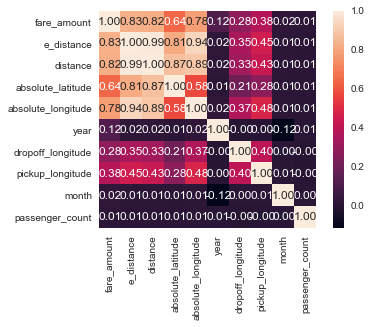

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

spearman_correlation = df.corr(method='spearman')
pick_columns=spearman_correlation.nlargest(10, 'fare_amount').index
correlationmap = np.corrcoef(df[pick_columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlationmap, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns_new.values, xticklabels=columns_new.values)

plt.show()

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)




In [252]:
X = train_df_train.drop('fare_amount',axis=1)
y = y = train_df_train[['fare_amount']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


standard_scaler = StandardScaler().fit(X_train)
rescaled_X_train = standard_scaler.transform(X_train)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(rescaled_X_train, y_train)
rf_predict = rf.predict(X_test)
#error = np.sqrt(mean_squared_error(y_test,pred))
print(rf_predict)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


[41.45 44.95 44.95 ... 44.95 44.95 41.45]


In [246]:
train_df_train.shape

(979060, 10)

In [247]:
len(y_test)

293718

In [248]:
len(X_test)

293718

In [249]:
len(rescaled_X_train)

685342

In [250]:
len(y_train)

685342

In [253]:
rf.fit(X, y)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [254]:
rf_predict = rf.predict(X_test)

In [255]:
print (rf_predict)

[20.2   3.73  5.35 ...  6.06  4.5  19.26]


In [257]:
y_train.head(5)

,fare_amount
661423,7.5
918011,16.9
960510,5.7
338825,7.0
991454,11.5


In [261]:
for i in range(10):
    print (rf_predict[i])


20.2
3.7300000000000004
5.35
8.42
7.140000000000001
10.74
10.27
21.883
4.5
9.620000000000001


In [262]:
y_train.head(10)

,fare_amount
661423,7.5
918011,16.9
960510,5.7
338825,7.0
991454,11.5
954904,8.1
750031,19.3
475327,14.5
974243,7.7
1830,20.0


In [267]:
rf_predict = rf.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,rf_predict))
print(error)

1.6738955465124932


In [264]:
print(rf_predict)

[ 8.3   10.2    5.06  ... 55.324 18.7    7.55 ]


In [268]:
test_df.shape

(9914, 9)

In [269]:
X.shape

(979060, 9)

In [270]:
rf_predict = rf.predict(test_df)
print (rf_predict)
print(pred)

[ 8.3   10.2    5.06  ... 55.324 18.7    7.55 ]
[[10.40567211]
 [11.1670048 ]
 [ 5.43030812]
 ...
 [49.22548212]
 [20.60224933]
 [ 8.64386011]]


In [278]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_predict_test = ridge.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,ridge_predict_test))
print(error)
print(ridge_predict_test)


ridge.fit(X, y)
ridge_predict=ridge.predict(test_df)
print(ridge_predict)

5.125687978892424
[[17.61463391]
 [ 6.27831087]
 [ 6.51227483]
 ...
 [ 8.14029401]
 [ 5.602278  ]
 [17.59841975]]
[[10.41173641]
 [11.16332172]
 [ 5.42224178]
 ...
 [49.09186726]
 [20.72469083]
 [ 8.61227372]]


In [274]:
submission['fare_amount'] = rf_predict
submission.to_csv('submission_3.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.300
1,2015-01-27 13:08:24.0000003,10.200
2,2011-10-08 11:53:44.0000002,5.060
3,2012-12-01 21:12:12.0000002,7.650
4,2012-12-01 21:12:12.0000003,14.620
5,2012-12-01 21:12:12.0000005,9.800
6,2011-10-06 12:10:20.0000001,4.820
7,2011-10-06 12:10:20.0000003,48.360
8,2011-10-06 12:10:20.0000002,10.420
9,2014-02-18 15:22:20.0000002,6.150


In [279]:
submission['fare_amount'] = ridge_predict
submission.to_csv('submission_4.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.411736
1,2015-01-27 13:08:24.0000003,11.163322
2,2011-10-08 11:53:44.0000002,5.422242
3,2012-12-01 21:12:12.0000002,7.884502
4,2012-12-01 21:12:12.0000003,13.716213
5,2012-12-01 21:12:12.0000005,10.329417
6,2011-10-06 12:10:20.0000001,6.287167
7,2011-10-06 12:10:20.0000003,50.044504
8,2011-10-06 12:10:20.0000002,11.622250
9,2014-02-18 15:22:20.0000002,7.750008


In [281]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.1,normalize=True, max_iter=1e5)

lassoreg.fit(X_train, y_train)
lassoreg_predict_test = ridge.predict(X_test)
error_lasso = np.sqrt(mean_squared_error(y_test,lassoreg_predict_test))
print(error_lasso)
print(lassoreg_predict_test)


ridge.fit(X, y)
lassoreg_predict=ridge.predict(test_df)
print(lassoreg_predict)


5.125332979742834
[[17.59400102]
 [ 6.26921835]
 [ 6.51012099]
 ...
 [ 8.14375733]
 [ 5.59645646]
 [17.60968464]]
[[10.41173641]
 [11.16332172]
 [ 5.42224178]
 ...
 [49.09186726]
 [20.72469083]
 [ 8.61227372]]


In [282]:
submission['fare_amount'] = lassoreg_predict
submission.to_csv('submission_5.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.411736
1,2015-01-27 13:08:24.0000003,11.163322
2,2011-10-08 11:53:44.0000002,5.422242
3,2012-12-01 21:12:12.0000002,7.884502
4,2012-12-01 21:12:12.0000003,13.716213
5,2012-12-01 21:12:12.0000005,10.329417
6,2011-10-06 12:10:20.0000001,6.287167
7,2011-10-06 12:10:20.0000003,50.044504
8,2011-10-06 12:10:20.0000002,11.622250
9,2014-02-18 15:22:20.0000002,7.750008


In [283]:
train_df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,date,day,distance,absolute_longitude,absolute_latitude,e_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,2009,6,15,0,1.030117,0.002701,0.009041,0.009436
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,2010,1,5,1,8.444828,0.036780,0.070701,0.079696


In [1]:
from sklearn.neural_network import MLPClassifier

In [2]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)